In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start='2010-09-18'
end='2022-09-18'
df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-09-17,9.927143,9.774286,9.917500,9.834643,634477200.0,8.397134
2010-09-20,10.135000,9.851786,9.860000,10.115357,658677600.0,8.636813
2010-09-21,10.262500,10.099643,10.137857,10.134643,668074400.0,8.653278
2010-09-22,10.285000,10.086071,10.096786,10.276786,585289600.0,8.774646
2010-09-23,10.455714,10.214286,10.226071,10.318571,786116800.0,8.810326


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-12,164.259995,159.300003,159.589996,163.429993,104956000.0,163.429993
2022-09-13,160.539993,153.369995,159.899994,153.839996,122656600.0,153.839996
2022-09-14,157.100006,153.610001,154.789993,155.309998,87965400.0,155.309998
2022-09-15,155.240005,151.380005,154.649994,152.369995,90481100.0,152.369995
2022-09-16,151.350006,148.369995,151.210007,150.699997,162157000.0,150.699997


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-09-17,9.927143,9.774286,9.917500,9.834643,634477200.0,8.397132
1,2010-09-20,10.135000,9.851786,9.860000,10.115357,658677600.0,8.636816
2,2010-09-21,10.262500,10.099643,10.137857,10.134643,668074400.0,8.653281
3,2010-09-22,10.285000,10.086071,10.096786,10.276786,585289600.0,8.774647
4,2010-09-23,10.455714,10.214286,10.226071,10.318571,786116800.0,8.810325


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,9.927143,9.774286,9.917500,9.834643,634477200.0
1,10.135000,9.851786,9.860000,10.115357,658677600.0
2,10.262500,10.099643,10.137857,10.134643,668074400.0
3,10.285000,10.086071,10.096786,10.276786,585289600.0
4,10.455714,10.214286,10.226071,10.318571,786116800.0


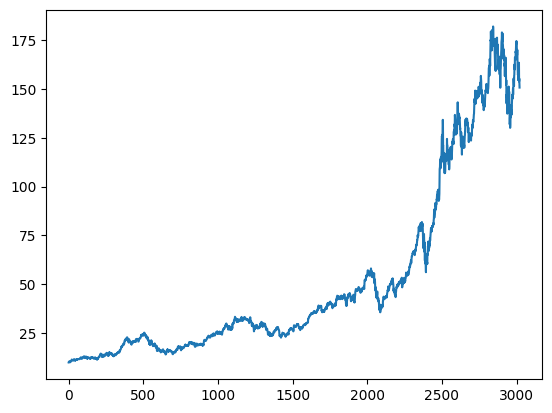

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,9.927143,9.774286,9.917500,9.834643,634477200.0
1,10.135000,9.851786,9.860000,10.115357,658677600.0
2,10.262500,10.099643,10.137857,10.134643,668074400.0
3,10.285000,10.086071,10.096786,10.276786,585289600.0
4,10.455714,10.214286,10.226071,10.318571,786116800.0
...,...,...,...,...,...
3016,164.259995,159.300003,159.589996,163.429993,104956000.0
3017,160.539993,153.369995,159.899994,153.839996,122656600.0
3018,157.100006,153.610001,154.789993,155.309998,87965400.0
3019,155.240005,151.380005,154.649994,152.369995,90481100.0


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3016    152.7708
3017    152.6369
3018    152.5258
3019    152.4316
3020    152.3098
Name: Close, Length: 3021, dtype: float64

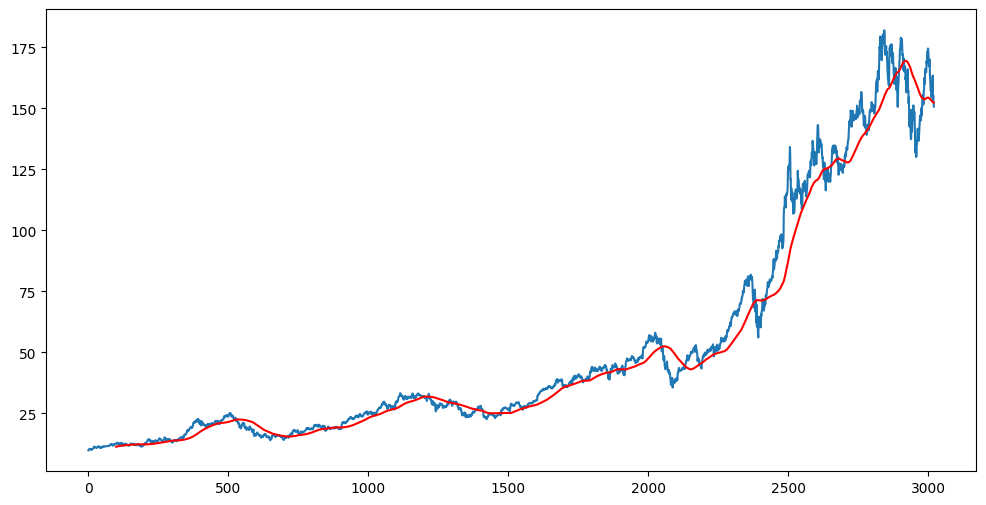

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3016    161.04555
3017    161.00505
3018    160.99755
3019    160.95820
3020    160.88520
Name: Close, Length: 3021, dtype: float64

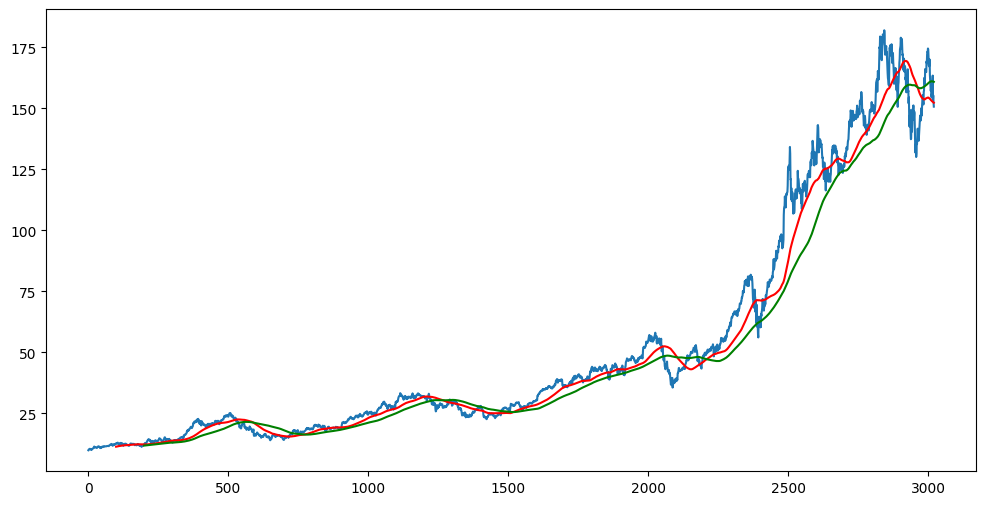

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(3021, 5)

In [13]:
#Splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(907, 1)


In [14]:
data_training.head()

,Close
0,9.834643
1,10.115357
2,10.134643
3,10.276786
4,10.318571


In [15]:
data_testing.head()

,Close
2114,42.722500
2115,42.544998
2116,42.700001
2117,42.605000
2118,42.732498


In [16]:
data_training.tail()

,Close
2109,43.544998
2110,43.560001
2111,42.735001
2112,42.602501
2113,42.357498


In [17]:
data_testing.tail()

,Close
3016,163.429993
3017,153.839996
3018,155.309998
3019,152.369995
3020,150.699997


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.        ],
       [0.00582601],
       [0.00622626],
       ...,
       [0.68282286],
       [0.68007293],
       [0.67498807]])

In [20]:
data_training_array.shape

(2114, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train) 
    

In [22]:
#MACHINE LEARNING MODEL

In [23]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
#1 because we are working for only close column otherwise it may not be 1
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

#all above are the 4 layers and now we add dense layer to add all4 layers
#units=1 because we have to predict only one value ie closing price
model.add(Dense(units=1))

In [25]:
model.summary()
#summary of LSTM MODEL

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
#Now compile the model and optimiser will be adam
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 13s 163ms/step - loss: 0.0279
Epoch 2/50
63/63 [==============================] - 10s 161ms/step - loss: 0.0080
Epoch 3/50
63/63 [==============================] - 12s 184ms/step - loss: 0.0059
Epoch 4/50
63/63 [==============================] - 12s 193ms/step - loss: 0.0062
Epoch 5/50
63/63 [==============================] - 12s 191ms/step - loss: 0.0048
Epoch 6/50
63/63 [==============================] - 11s 175ms/step - loss: 0.0047
Epoch 7/50
63/63 [==============================] - 11s 181ms/step - loss: 0.0047
Epoch 8/50
63/63 [==============================] - 14s 215ms/step - loss: 0.0041
Epoch 9/50
63/63 [==============================] - 12s 185ms/step - loss: 0.0048
Epoch 10/50
63/63 [==============================] - 12s 187ms/step - loss: 0.0042
Epoch 11/50
63/63 [==============================] - 12s 187ms/step - loss: 0.0038
Epoch 12/50
63/63 [==============================] - 12s 194ms/step - loss: 0.0045
Epoch 13/50
6

In [27]:
model.save('keras_model.h5')

In [28]:
data_testing.head()

,Close
2114,42.722500
2115,42.544998
2116,42.700001
2117,42.605000
2118,42.732498


In [29]:
data_training.tail(100)

,Close
2014,54.560001
2015,54.592499
2016,55.007500
2017,54.415001
2018,55.197498
...,...
2109,43.544998
2110,43.560001
2111,42.735001
2112,42.602501


In [30]:
#like for predicting the value of 2114 index we need value of previous 100 days
#for this we have to fetch training data to get data of previous 100 days(these 100 values must be append)

past_100_days=data_training.tail(100)

In [31]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Anupam Shukla\AppData\Local\Temp\ipykernel_2336\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [32]:
final_df.head()

,Close
0,54.560001
1,54.592499
2,55.007500
3,54.415001
4,55.197498


In [33]:
#Now again i have to apply scaling down because this has not been scale down
input_data=scaler.fit_transform(final_df)
input_data

array([[0.1298114 ],
       [0.13003328],
       [0.13286677],
       ...,
       [0.81770079],
       [0.79762737],
       [0.78622515]])

In [34]:
#now u see it is scale down between 0 to 1

In [35]:
input_data.shape

(1007, 1)

In [36]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    


In [37]:
#now again convert it into numpy arrays
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [38]:
# Making Predictions

y_predicted=model.predict(x_test)

29/29 [==============================] - 2s 60ms/step


In [39]:
y_predicted.shape

(907, 1)

In [40]:
y_test

array([0.04898865, 0.04777672, 0.04883503, 0.04818639, 0.04905691,
       0.05093454, 0.04927882, 0.05253905, 0.05468976, 0.05486046,
       0.05578219, 0.05284628, 0.05595289, 0.05745499, 0.05690876,
       0.05518478, 0.05173679, 0.05243663, 0.06266108, 0.06609201,
       0.06745755, 0.07090551, 0.07498506, 0.07822822, 0.0756849 ,
       0.07846719, 0.09029614, 0.08340019, 0.07945721, 0.07612869,
       0.07899633, 0.07942306, 0.08152257, 0.08372451, 0.08846975,
       0.09073996, 0.09132031, 0.09355637, 0.09884784, 0.09782367,
       0.09973542, 0.09688486, 0.09674831, 0.0973628 , 0.09739694,
       0.10401981, 0.10526585, 0.10640949, 0.1114449 , 0.1108987 ,
       0.10768968, 0.1060169 , 0.10654605, 0.09982077, 0.11663396,
       0.11429546, 0.11873346, 0.11315182, 0.10355893, 0.1036272 ,
       0.09990612, 0.0938636 , 0.0743023 , 0.07932065, 0.08317828,
       0.08174448, 0.079901  , 0.06981308, 0.0758044 , 0.06928394,
       0.06395836, 0.06278058, 0.06151744, 0.06006658, 0.06163

In [41]:
y_predicted

array([[0.12105399],
       [0.12226415],
       [0.12342681],
       [0.12451681],
       [0.12550858],
       [0.12638044],
       [0.12712479],
       [0.12773961],
       [0.12823594],
       [0.12863673],
       [0.12896626],
       [0.12924783],
       [0.12949169],
       [0.12971038],
       [0.12991977],
       [0.13013002],
       [0.13034049],
       [0.13053699],
       [0.13070571],
       [0.1308692 ],
       [0.1310688 ],
       [0.13134207],
       [0.13172418],
       [0.13224971],
       [0.13294712],
       [0.13381195],
       [0.13482504],
       [0.13600345],
       [0.1373329 ],
       [0.13876247],
       [0.14022166],
       [0.14165057],
       [0.14299735],
       [0.14422828],
       [0.14533374],
       [0.1463373 ],
       [0.1472781 ],
       [0.14819178],
       [0.14911188],
       [0.1500839 ],
       [0.15113288],
       [0.15227187],
       [0.1534825 ],
       [0.15473029],
       [0.15597822],
       [0.15719002],
       [0.15836821],
       [0.159

In [42]:
# Now i will scale it up for that i have to find from how much factor i have scale it down
scaler.scale_

array([0.00682769])

In [43]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

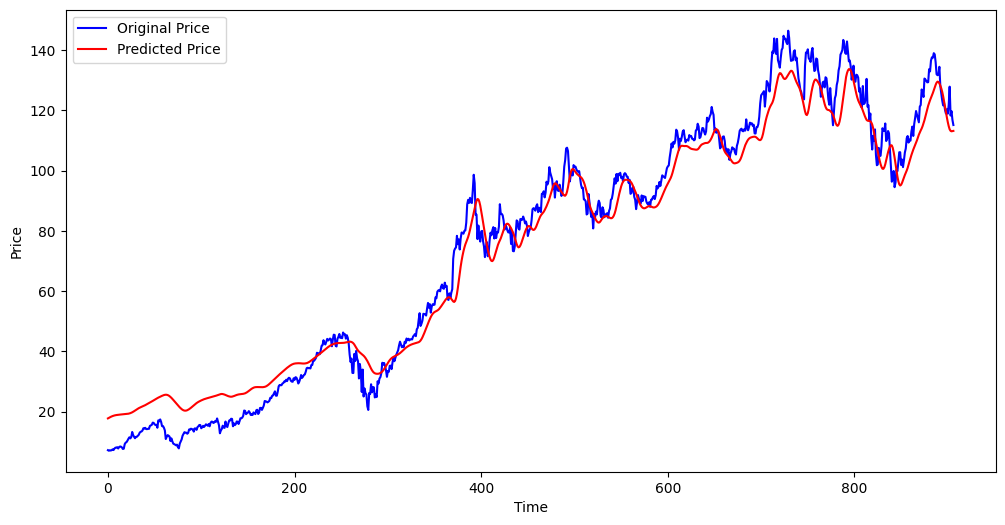

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
# We can't say it is perfected prediction of stock but it gives good stock trend